In [69]:
from pandas_datareader.data import DataReader
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

start_date = dt.date(2014, 1, 1)
end_date = dt.date(2019, 12, 31)

ETIHX_holdings = pd.read_csv(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\ETIHX_holdings_20191127.csv")
RYCFX_holdings = pd.read_csv(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\RYCFX_holdings_20190930.csv")

ETIHX_holdings.head()

preload = True  # set to False to pull data from yfinance


In [70]:
# helper functions

def get_data_for_multiple_stocks(tickers, start_date, end_date):
    '''
    tickers: list of tickers to get data for
    start_date, end_date: dt.datetime objects
    method returns a dictionary b{ticker: pd.DataFrame}
    '''
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')
    stocks = dict()
    # loop through all the tickers
    for i, ticker in enumerate(tickers):
        if i % 5 == 0:
            print(f'{i}/{len(tickers)}')

        try:
            # get the data for the specific ticker
            s = DataReader(ticker, 'yahoo', start_date_str, end_date_str)

            s.insert(0, "Ticker", ticker)

            s['Prev Close'] = s['Adj Close'].shift(1)
            s['daily_return'] = (s['Adj Close']/s['Prev Close']) - 1
            s['log_return'] = np.log(s['Adj Close']/s['Prev Close'])
            # s['perc_return'] = (s['Adj Close']/s['Prev Close'])
            # add it to the dictionary
            stocks[ticker] = s
        except:
            print(f'something went wrong with {ticker}')
            continue

    # return the dictionary
    return stocks


def get_df_by_metric(data_dict, metric):
    '''
    data_dict: dictionary of the indiv ticker data
    
    metric: the metric of the data you want (eg. Adj Close)
    
    returns pd.DataFrame with each column representing one ticker
    '''
    output = pd.DataFrame()

    for k, v in data_dict.items():
        output[k] = v[metric]

    output.dropna(how='all', inplace=True)
    return output


In [71]:
# ETIHX
if not preload:
    tickers = ETIHX_holdings['ticker'][:31]

    ETIHX_assets = get_data_for_multiple_stocks(tickers, dt.date(2019, 1, 1), dt.date(2019, 12, 31))

    ETIHX_assets.pop("KRTX")


•Celegene Corp (CELG) acquired by Bristol-Myers Squibb (BMY). Each share of CELG converted to BMY. https://news.bms.com/news/corporate-financial/2019/Bristol-Myers-Squibb-to-Acquire-Celgene-to-Create-a-Premier-Innovative-Biopharma-Company/default.aspx   

•yfinance does not have data for First American Govt Obligations Fund (FAAXX), we use the next ticker instead. 

•The Medicines Company (MDCO) acquired by Novartis AG (NOVN)
https://www.novartis.com/news/media-releases/novartis-successfully-completes-acquisition-medicines-company-adding-potentially-first-class-investigational-cholesterol-lowering-therapy-inclisiran 

•Spark Therapeutics (ONCE) acquired by Roche (RHBY).
https://sparktx.com/press_releases/spark-therapeutics-enters-into-definitive-merger-agreement-with-roche/


In [72]:
# RYCFX
if not preload:
    tickers = RYCFX_holdings['ticker'][:31]

    RYCFX_assets = get_data_for_multiple_stocks(tickers, dt.date(2019, 1, 1), dt.date(2019, 12, 31))

    RYCFX_assets.keys()

In [73]:
# save data to dict, no need to call from yfinance next time
import pickle
from pathlib import Path

ETIHX_path = Path(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\ETIHX_assets (2).pickle")
RYCFX_path = Path(r'C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\RYCFX_assets.pickle')


if preload:
    # load the pickle file
    with open(ETIHX_path, 'rb') as handle1:
        ETIHX_assets = pickle.load(handle1)
    
    with open(RYCFX_path, 'rb') as handle2:
        RYCFX_assets = pickle.load(handle2)

else:
    # else dump the pickle files
    with open(ETIHX_path, 'wb') as handle1:
        pickle.dump(ETIHX_assets, handle1)
    
    with open(RYCFX_path, 'wb') as handle2:
        pickle.dump(RYCFX_assets, handle2)


In [74]:
ETIHX_log_returns_df = get_df_by_metric(ETIHX_assets, 'log_return')
ETIHX_log_returns_df.head()

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.016347,0.028526,-0.015049,-0.013498,-0.018658,0.034359,0.051234,-0.152481,0.023278,-0.051967,...,-0.010113,0.031196,0.018717,0.045310,0.036035,-0.022935,-0.061939,0.056982,0.051293,0.0
2019-01-03,-0.034256,0.021220,-0.007751,-0.009993,-0.011191,-0.042372,-0.022651,-0.033450,-0.058304,-0.049670,...,-0.040778,-0.005924,-0.003981,0.000000,-0.001687,-0.011668,0.022118,-0.044384,-0.040822,0.0
2019-01-04,0.057526,0.048616,0.078924,0.083770,0.075025,0.038973,0.030237,0.042467,-0.017984,0.093629,...,0.027014,0.013574,0.028189,0.075212,0.052081,0.008935,0.044017,0.072430,0.063887,0.0
2019-01-07,0.137939,0.032942,-0.048002,0.032015,0.091397,0.045971,0.070577,0.002124,0.075403,0.132222,...,0.047537,-0.004112,0.030556,0.049797,-0.217550,-0.074924,-0.057862,0.091731,-0.074359,0.0
2019-01-08,0.010560,0.027993,0.008327,0.027643,0.030794,0.047339,0.052649,0.034522,-0.008004,0.023957,...,-0.025048,0.034706,0.004379,0.026254,-0.017415,-0.029563,-0.190722,0.094948,0.008734,0.0


In [75]:
# get value held for each asset in ETIHX portfolio
ETIHX_weights = {}
for ticker in ETIHX_log_returns_df.columns:
    ETIHX_weights[ticker] = ETIHX_holdings[ETIHX_holdings['ticker']==ticker]['value_usd'].values[0]
    
# normalize weights
total_value = sum(ETIHX_weights.values())
for k,v in ETIHX_weights.items():
    ETIHX_weights[k] = v / total_value
    
ETIHX_weights = pd.Series(ETIHX_weights)

all(ETIHX_log_returns_df.columns == ETIHX_weights.index)  # check



True

In [76]:
# get value held for each asset in RYCFX portfolio
RYCFX_weights = {}
RYCFX_log_returns_df = get_df_by_metric(RYCFX_assets, 'log_return')

for ticker in RYCFX_log_returns_df.columns:
    RYCFX_weights[ticker] = RYCFX_holdings[RYCFX_holdings['ticker']==ticker]['value_usd'].values[0]
    
# normalize weights
total_value = sum(RYCFX_weights.values())
for k,v in RYCFX_weights.items():
    RYCFX_weights[k] = v / total_value
    
RYCFX_weights = pd.Series(RYCFX_weights)

all(RYCFX_log_returns_df.columns == RYCFX_weights.index)  # check



True

In [77]:
# get data for index
index_data = get_data_for_multiple_stocks(['^NBI'], dt.date(2019, 1, 1), dt.date(2019, 12, 31))
index_log_returns_df = get_df_by_metric(index_data, 'log_return')
index_weights = pd.Series([1], index=['^NBI'])
index_log_returns_df.head()

0/1


,^NBI
Date,
2019-01-02,0.005779
2019-01-03,0.003398
2019-01-04,0.049706
2019-01-07,0.032554
2019-01-08,0.006712


#### Calculate historical sharpe ratio, alpha, annualised return and standard deviation.¶

In [78]:
# risk free rate
yield_df = pd.read_csv(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\yield_rate_2019.csv")
yield_df.drop(yield_df.columns.difference(['Date','1 Yr']), 1, inplace=True)

yield_df['1 Yr'] = yield_df['1 Yr'].apply(lambda x: x / 100)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_df.set_index("Date", inplace=True)
yield_df.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)
yield_df.head()


,risk_free_rate
Date,
2019-01-02,0.0260
2019-01-03,0.0250
2019-01-04,0.0257
2019-01-07,0.0258
2019-01-08,0.0260


In [79]:
rf_rate_2019 = yield_df['risk_free_rate'].mean()
rf_rate_2019

0.020520399999999984

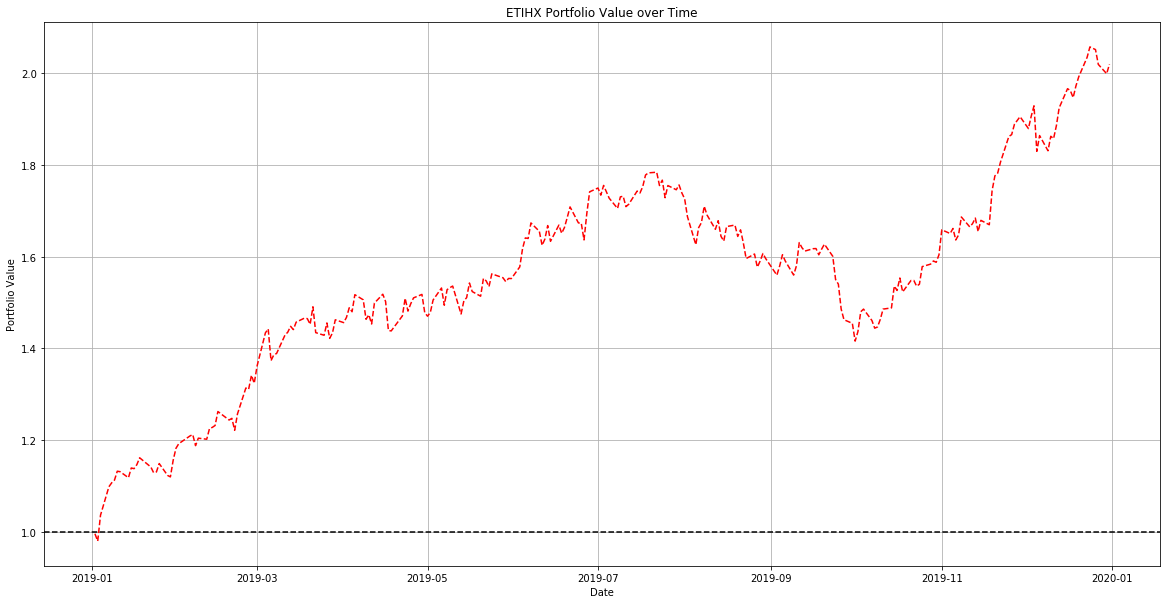

stats for ETIHX: (0.9994388469386611, 0.28046691529347106, 3.5634821522277673)


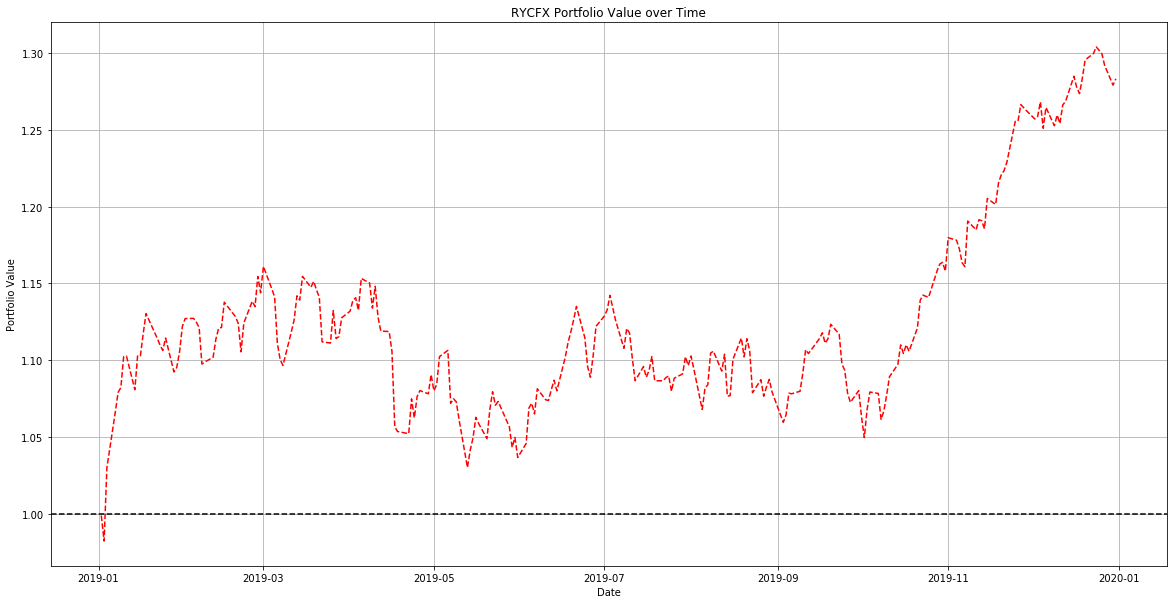

stats for RYCFX: (0.2628898054998575, 0.1890418496338441, 1.3906434263579721)


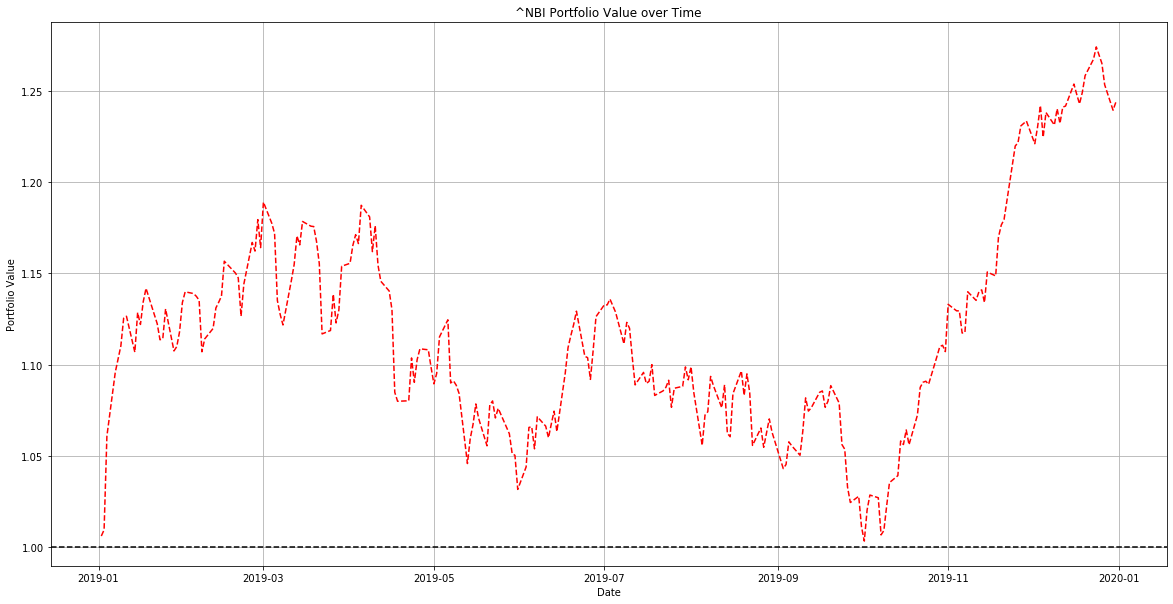

stats for ^NBI: (0.22357048298492177, 0.19959501688336398, 1.120120564510727)


In [80]:
def get_returns_risk_sharpe(returns_data, weights, rf_rate,
                            plot_returns=False, portfolio_name=""):
    '''
    returns_data is a pd.DataFrame containing the log returns for the various assets in the portfolio
    weights is a pd.Series containing the percentage of each holding
    plot_returns: set to True to show plot of portfolio value over time
    rf_rate: the annualised risk free rate for the period of the returns
    
    this function calculates the annualised returns (in excess of risk free rate), \
        risk and sharpe ratio
    '''
    
    if not all(returns_data.columns == weights.index):
        print ('please align the indexes for weights and returns data')
        return
    
    n_days = returns_data.shape[0]
    
    # portfolio return
    returns = np.dot(weights, np.exp(returns_data.T.values) - 1)  # portfolio simple returns
    
    compounded_returns = np.cumprod(1 + returns)
    final_return = compounded_returns[-1]

    
    return_daily = np.exp(np.log(final_return) / n_days) - 1
    return_yearly = (1 + return_daily) ** 252 - 1
    return_yearly -= rf_rate
    
    # portfolio variance
    sd = np.std(returns)
    annualised_sd = np.sqrt(252) * sd
        
    sharpe_ratio = return_yearly / annualised_sd
    
    if plot_returns:
        plt.figure(figsize=(20, 10))
        plt.plot(returns_data.index, compounded_returns, 'r--', label='returns')
        plt.axhline(y=1, color='black', linestyle='--')
        plt.grid(True)
        plt.ylabel(f'Portfolio Value')
        plt.xlabel('Date')
        plt.title(f"{portfolio_name} Portfolio Value over Time")
        plt.show()

    return return_yearly, annualised_sd, sharpe_ratio

ETIHX_stats = get_returns_risk_sharpe(ETIHX_log_returns_df, ETIHX_weights, rf_rate_2019, True, 'ETIHX')
print(f"stats for ETIHX: {ETIHX_stats}")

RYCFX_stats = get_returns_risk_sharpe(RYCFX_log_returns_df, RYCFX_weights, rf_rate_2019, True, 'RYCFX')
print(f"stats for RYCFX: {RYCFX_stats}")


index_stats = get_returns_risk_sharpe(index_log_returns_df, index_weights, rf_rate_2019, True, '^NBI')
print(f"stats for ^NBI: {index_stats}")

- ETIHX -- Annualised return: 0.9994388469386611, Annualised s.d: 0.28046691529347106, Sharpe Ratio: 3.5634821522277673
- RYCFX -- Annualised return: 0.2628898054998575, Annualised s.d: 0.1890418496338441, Sharpe Ratio: 1.3906434263579721
- NBI -- Annualised return: 0.22357048298492177, Annualised s.d: 0.19959501688336398, Sharpe Ratio: 1.120120564510727

####  Load weights for optimal portfolio

In [81]:
import pickle
from pathlib import Path

optimised_weights_path = Path(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\optimised_weights.pickle")
with open(optimised_weights_path, 'rb') as handle:
    optimised_weights = pickle.load(handle)

optimised_weights.sort_values(ascending=False)

GWPH    0.184
CRNX    0.145
FOLD    0.104
AIMT    0.082
EXAS    0.066
NBIX    0.057
ZGNX    0.049
BHVN    0.048
XNCR    0.047
COLL    0.042
GLPG    0.034
XENE    0.027
AVRO    0.024
GBT     0.016
MNTA    0.016
ASND    0.016
ARGX    0.014
SRPT    0.013
MYOV    0.009
RAFA    0.006
SAGE    0.002
MGTA    0.000
VCYT    0.000
QURE    0.000
BPMC    0.000
MYOK    0.000
MRTX    0.000
RCKT    0.000
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

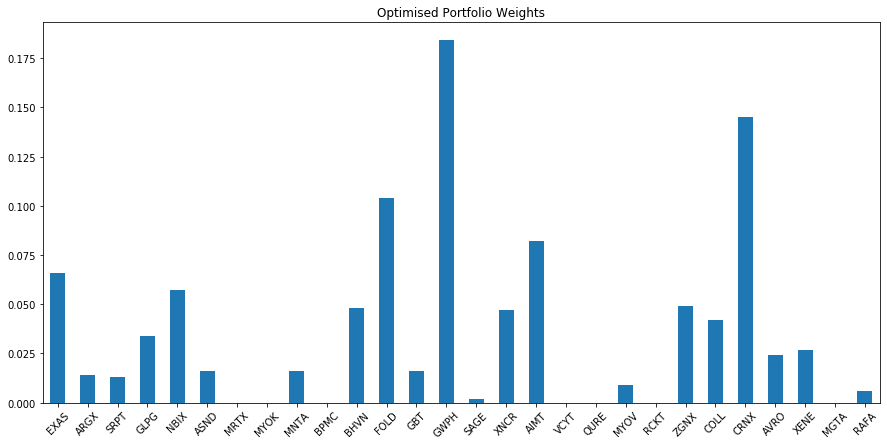

In [82]:
optimised_weights.plot(kind='bar', title='Optimised Portfolio Weights', figsize=(15, 7))
plt.xticks(rotation='45')

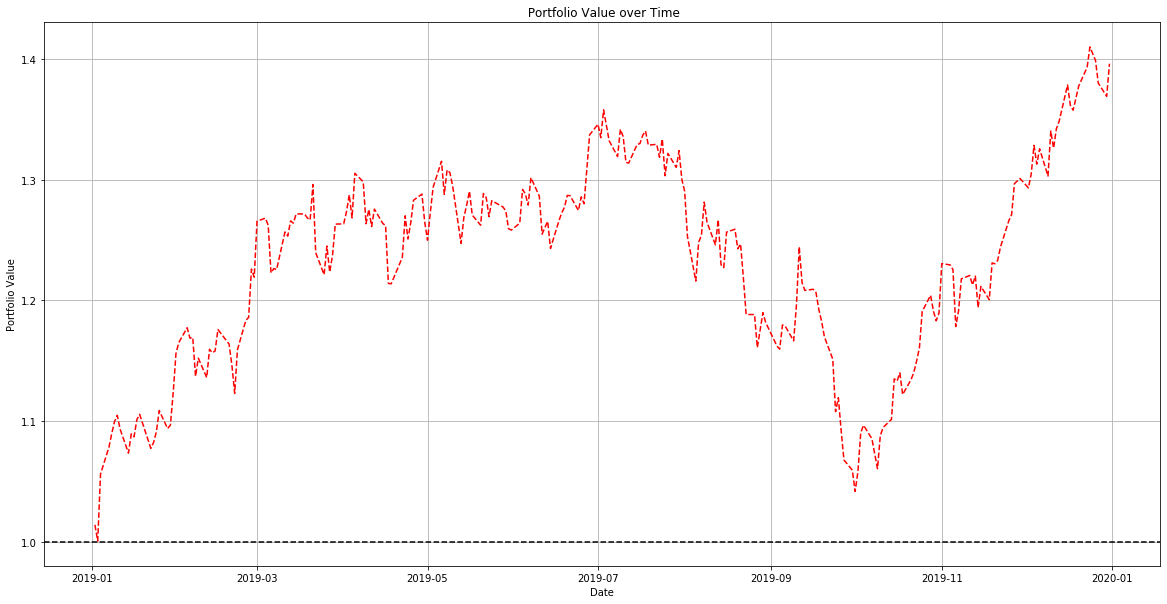

(0.37579133461396574, 0.2561323941293035, 1.4671761293272991)

In [83]:
optimal_portfolio_stats = get_returns_risk_sharpe(ETIHX_log_returns_df, optimised_weights, rf_rate_2019, True)
optimal_portfolio_stats

- Optimal portfolio -- Annualised return: 0.37579133461396574, Annualised s.d: 0.2561323941293035, Sharpe Ratio: 1.4671761293272991

In [84]:
# compile stats
in_sample = pd.DataFrame(np.array([ETIHX_stats, RYCFX_stats, index_stats, optimal_portfolio_stats]), 
                         columns=['return', 'std_dev', 'sharpe_ratio'], index=['Best', 'Worst', 'Index', 'Optimal'])
in_sample

,return,std_dev,sharpe_ratio
Best,0.999439,0.280467,3.563482
Worst,0.262890,0.189042,1.390643
Index,0.223570,0.199595,1.120121
Optimal,0.375791,0.256132,1.467176


#### Out of sample¶

In [85]:
# tickers to get
ETIHX_tickers = ETIHX_holdings['ticker'][:31]
RYCFX_tickers = RYCFX_holdings['ticker'][:31]

# date params
start = dt.date(2020, 1 ,1)
end = dt.date(2020, 6, 30)

# get out of sample data
ETIHX_oos = get_data_for_multiple_stocks(ETIHX_tickers, start, end)
RYCFX_oos = get_data_for_multiple_stocks(RYCFX_tickers, start, end)
index_oos = get_data_for_multiple_stocks(['^NBI'], start, end)

0/31
5/31
10/31
15/31
20/31
25/31
30/31
0/31
something went wrong with FAAXX
5/31
10/31
15/31
20/31
25/31
30/31
0/1


In [86]:
# KRTX IPO was mid-2019, we left it out from the optimisation process.
ETIHX_oos.pop("KRTX")

,Ticker,High,Low,Open,Close,Volume,Adj Close,Prev Close,daily_return,log_return
Date,,,,,,,,,,
2019-12-31,KRTX,76.420998,70.000000,70.250000,75.339996,366400,75.339996,NaN,NaN,NaN
2020-01-02,KRTX,76.773003,71.000000,76.099998,72.639999,429500,72.639999,75.339996,-0.035837,-0.036495
2020-01-03,KRTX,74.199997,68.110001,71.000000,70.529999,294200,70.529999,72.639999,-0.029047,-0.029478
2020-01-06,KRTX,75.320000,68.760002,70.970001,71.860001,573100,71.860001,70.529999,0.018857,0.018682
2020-01-07,KRTX,74.000000,70.099998,71.120003,70.849998,262300,70.849998,71.860001,-0.014055,-0.014155
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,KRTX,110.769997,104.169998,106.320000,108.620003,252500,108.620003,105.739998,0.027237,0.026872
2020-06-25,KRTX,123.730003,107.860001,109.070000,117.209999,367300,117.209999,108.620003,0.079083,0.076112
2020-06-26,KRTX,118.209999,108.019997,117.489998,108.389999,968600,108.389999,117.209999,-0.075250,-0.078231


In [87]:
# risk free rate for 2020
yield_df = pd.read_csv(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\yield_rate_2020.csv")
yield_df.drop(yield_df.columns.difference(['Date','1 Yr']), 1, inplace=True)

yield_df['1 Yr'] = yield_df['1 Yr'].apply(lambda x: x / 100)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_df.set_index("Date", inplace=True)
yield_df.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)
yield_df.head()

,risk_free_rate
Date,
2020-01-02,0.0156
2020-01-03,0.0155
2020-01-06,0.0154
2020-01-07,0.0153
2020-01-08,0.0155


In [88]:
rf_rate_2020 = yield_df['risk_free_rate'].mean()
rf_rate_2020

0.006174400000000009

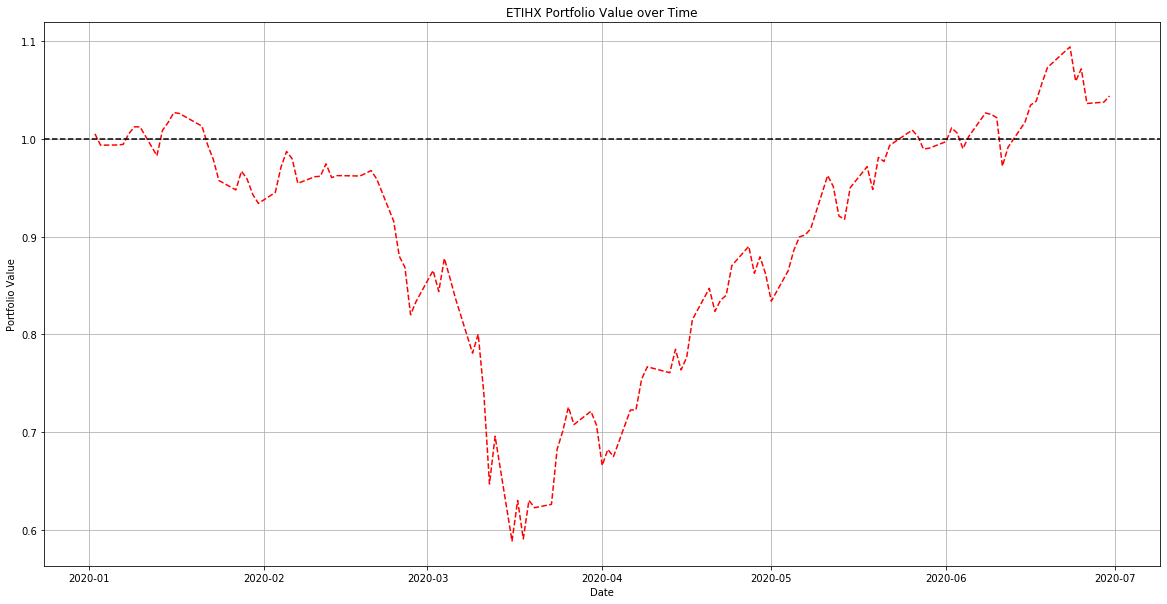

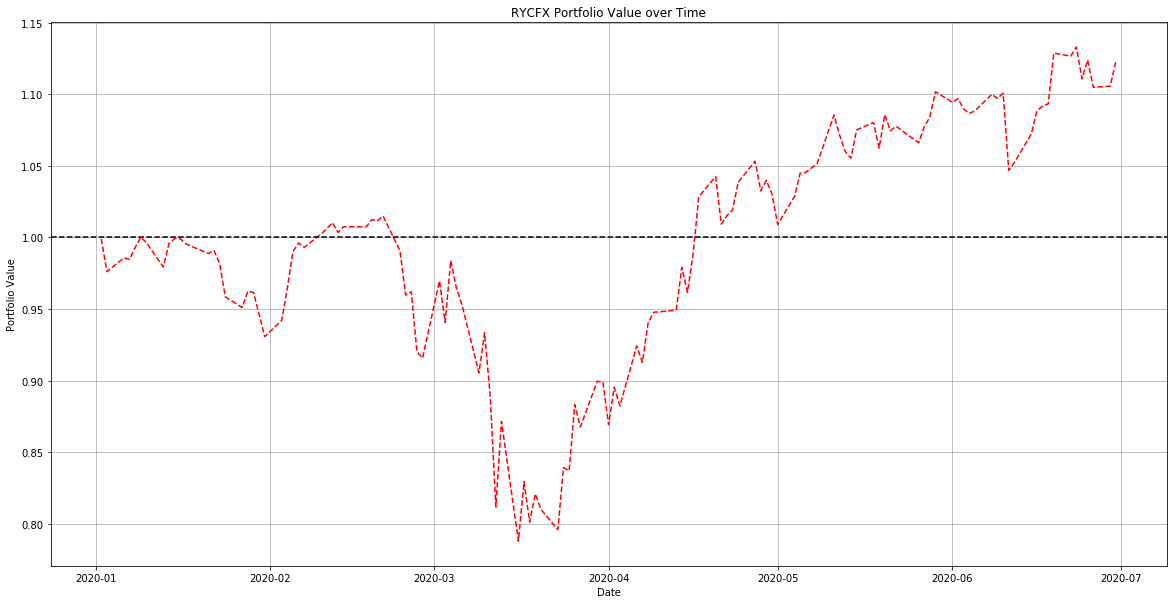

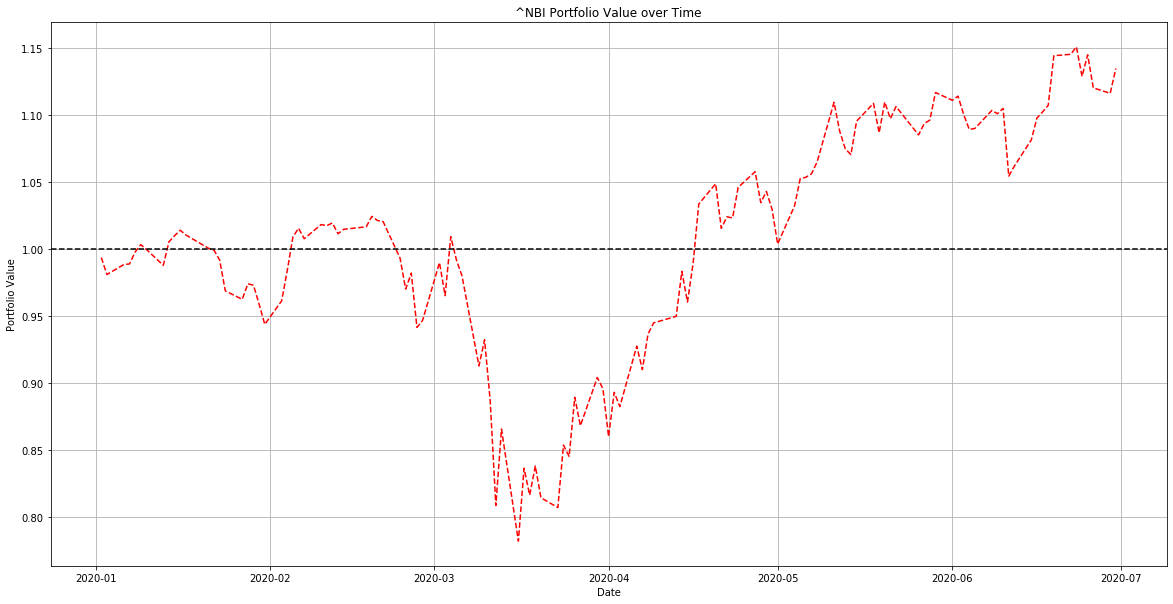

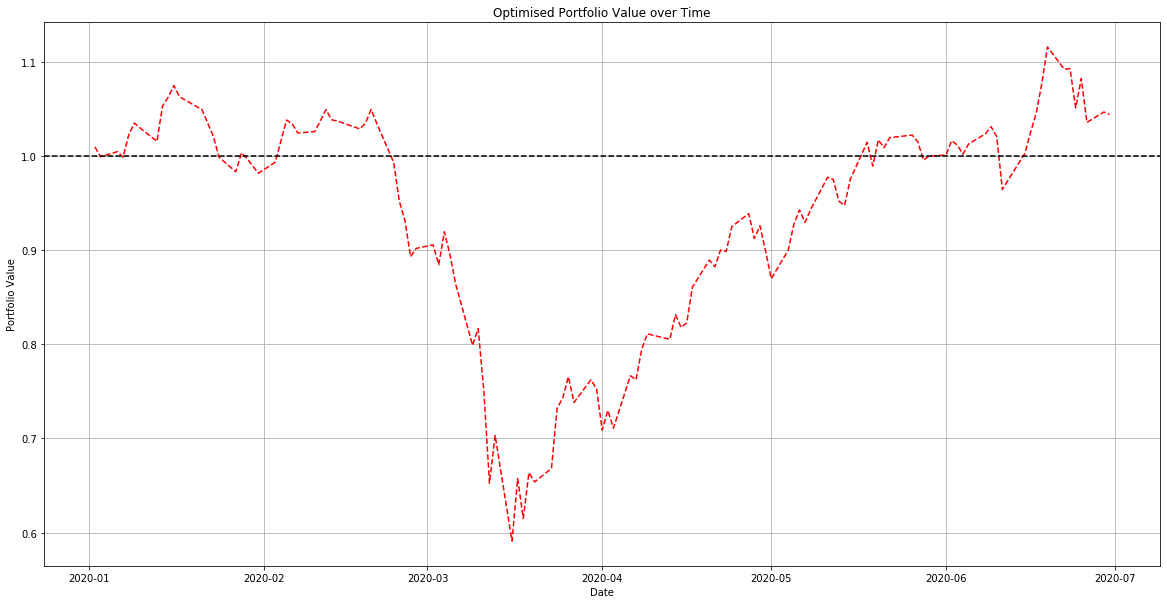

In [89]:
ETIHX_oos_returns = get_df_by_metric(ETIHX_oos, 'log_return')
RYCFX_oos_returns = get_df_by_metric(RYCFX_oos, 'log_return')
index_oos_returns = get_df_by_metric(index_oos, 'log_return')

# drop companies which were acquired in 2020
acquired_stocks = ['BOLD', 'STML']
ETIHX_oos_returns.drop(acquired_stocks, inplace=True, axis=1)

# align weights, data for some of the stocks not available in 2020
ETIHX_oos_weights = ETIHX_weights[ETIHX_oos_returns.columns].dropna()
optimised_oos_weights = optimised_weights[ETIHX_oos_returns.columns].dropna()
RYCFX_oos_weights = RYCFX_weights[RYCFX_oos_returns.columns].dropna()

# get oos stats
ETIHX_oos_stats = get_returns_risk_sharpe(ETIHX_oos_returns, ETIHX_oos_weights, rf_rate_2020, True, 'ETIHX')
RYCFX_oos_stats = get_returns_risk_sharpe(RYCFX_oos_returns, RYCFX_oos_weights, rf_rate_2020, True, 'RYCFX')
index_oos_stats = get_returns_risk_sharpe(index_oos_returns, index_weights, rf_rate_2020, True, '^NBI')
optimised_oos_stats = get_returns_risk_sharpe(ETIHX_oos_returns, optimised_oos_weights, rf_rate_2020, True, 'Optimised')

In [90]:
# compile results
out_of_sample = pd.DataFrame([ETIHX_oos_stats, RYCFX_oos_stats, index_oos_stats, optimised_oos_stats],
                            columns=['return', 'std_dev', 'sharpe_ratio'],
                            index=['ETIHX', 'RYCFX', 'Index', 'optimal'])
out_of_sample

,return,std_dev,sharpe_ratio
ETIHX,0.083952,0.533909,0.157240
RYCFX,0.257055,0.392984,0.654110
Index,0.284516,0.411984,0.690600
optimal,0.084422,0.564514,0.149547


#### Historical Alpha

In [91]:
rf_2019 = pd.read_csv(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\yield_rate_2019.csv")
rf_2019.drop(rf_2019.columns.difference(['Date','1 Yr']), 1, inplace=True)

rf_2019['1 Yr'] = rf_2019['1 Yr'].apply(lambda x: x / 100)
rf_2019['Date'] = pd.to_datetime(rf_2019['Date'])
rf_2019.set_index("Date", inplace=True)
rf_2019.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)
rf_2019.head()

,risk_free_rate
Date,
2019-01-02,0.0260
2019-01-03,0.0250
2019-01-04,0.0257
2019-01-07,0.0258
2019-01-08,0.0260


In [131]:
ETIHX_alpha = deepcopy(ETIHX_log_returns_df)
ETIHX_alpha = get_pfv(ETIHX_alpha, ETIHX_weights)
ETIHX_alpha = pd.concat([ETIHX_alpha, rf_2019], axis=1)

RYCFX_alpha = deepcopy(RYCFX_log_returns_df)
RYCFX_alpha = get_pfv(RYCFX_alpha, RYCFX_weights)
RYCFX_alpha = pd.concat([RYCFX_alpha, rf_2019], axis=1)

opt_alpha = get_pfv(ETIHX_log_returns_df, optimised_weights)
opt_alpha = pd.concat([opt_alpha, rf_2019], axis=1)

index_alpha = deepcopy(index_log_returns_df)
index_alpha = get_pfv(index_alpha, index_weights)
index_alpha = pd.concat([index_alpha, rf_2019], axis=1)

In [132]:
# fill na values for rf rate
ETIHX_alpha['risk_free_rate'].fillna(method='ffill', inplace=True)
RYCFX_alpha['risk_free_rate'].fillna(method='ffill', inplace=True)
index_alpha['risk_free_rate'].fillna(method='ffill', inplace=True)
opt_alpha['risk_free_rate'].fillna(method='ffill', inplace=True)

In [133]:
#Calculating excess of risk free rate
ETIHX_alpha['excess_returns'] = ETIHX_alpha['values'] - ETIHX_alpha['risk_free_rate']
RYCFX_alpha['excess_returns'] = RYCFX_alpha['values'] - RYCFX_alpha['risk_free_rate']
index_alpha['excess_returns'] = index_alpha['values'] - index_alpha['risk_free_rate']
opt_alpha['excess_returns'] = opt_alpha['values'] - opt_alpha['risk_free_rate']

In [136]:
import scipy.stats as stats
ETIHX_b,ETIHX_a,ETIHX_r_value,ETIHX_p_value,ETIHX_std_err = \
    stats.linregress(index_alpha['excess_returns'].iloc[1:], ETIHX_alpha['excess_returns'].iloc[1:])
    
RYCFX_b,RYCFX_a,RYCFX_r_value,RYCFX_p_value,RYCFX_std_err = \
    stats.linregress(index_alpha['excess_returns'].iloc[1:], RYCFX_alpha['excess_returns'].iloc[1:])
    
opt_b,opt_a,__, ___, __ = \
    stats.linregress(index_alpha['excess_returns'].iloc[1:], opt_alpha['excess_returns'].iloc[1:]) 

In [137]:
print(ETIHX_b)
print(RYCFX_b)
print(opt_b)

1.10633516919916
0.9137864540208434
1.0402636591275203


* ETIHX beta: 1.1069  
* RYCFX beta: 0.9132  
* Optimised portfolio beta: 1.04

In [138]:
print(ETIHX_a)
print(RYCFX_a)
print(opt_a)

0.004129830653264634
-0.001540305658596565
0.001265570967841894


* ETIHX alpha: 0.004303
* RYCFX alpha: -0.001565
* optimised portfolio alpha: 0.00126

#### Risk Analysis 

Calculation of VaR and ES by Historical Simulation and Parametric Approach.

#### Historical Simulation

In [98]:
from copy import deepcopy

def log_to_simple(x):
    return np.exp(x) - 1

def get_pfv(log_returns_df, weights):
    simple_returns = deepcopy(log_returns_df)
    portfolio_values = []

    for i in simple_returns.columns:
        simple_returns[i] = simple_returns[i].apply(log_to_simple)

    for i in range(simple_returns.shape[0]):
        portfolio_values.append(weights.dot(simple_returns.iloc[i]))
    
    simple_returns = simple_returns.assign(values = portfolio_values)
    return simple_returns

def get_var(log_returns_df, weights):
    df = get_pfv(log_returns_df, weights)
    historic_var = np.percentile(df['values'], 5)

    return historic_var

def get_es(log_returns_df, weights):
    df = get_pfv(log_returns_df, weights)
    threshold = get_var(log_returns_df, weights)
    df = df.loc[df['values'] <= threshold]
    return df['values'].mean()

In [99]:
# in sample VaR
print(-get_var(ETIHX_log_returns_df, ETIHX_weights))
print(-get_var(RYCFX_log_returns_df, RYCFX_weights))
print(-get_var(ETIHX_log_returns_df, optimised_weights))
print(-get_var(index_log_returns_df, index_weights))

0.022876655054350298
0.017773206186880823
0.024806422414845455
0.019807829263437195


- Var is 0.022876655054350298 for best portfolio at 95% confidence level
- Var is 0.017773206186880823 for worst portfolio at 95% confidence level
- Var is 0.024806422414845455 for optimised portfolio at 95% confidence level
- Var is 0.019807829263437195 for index at 95% confidence level

In [100]:
# in sample ES
print(-get_es(ETIHX_log_returns_df, ETIHX_weights))
print(-get_es(RYCFX_log_returns_df, RYCFX_weights))
print(-get_es(ETIHX_log_returns_df, optimised_weights))
print(-get_es(index_log_returns_df, index_weights))

0.03465152684745964
0.025238492388514777
0.03222861274567132
0.02749765645251357


- ES is 0.03465152684745964 for best portfolio at 95% confidence level
- ES is 0.025238492388514777 for worst portfolio at 95% confidence level
- ES is 0.03222861274567132 for optimised portfolio at 95% confidence level
- ES is 0.02749765645251357 for index at 95% confidence level

#### Parametric Approach

In [101]:
from scipy.stats import norm

best = ETIHX_log_returns_df
worst = RYCFX_log_returns_df
index = index_log_returns_df
vcv_best = np.cov(ETIHX_log_returns_df.T)
vcv_worst = np.cov(RYCFX_log_returns_df.T)
vcv_index = np.cov(index_log_returns_df.T)

# best portfolio
mu_best = np.dot(np.exp(best.mean()) - 1, ETIHX_weights)
mu_best = np.log(1 + mu_best)
var_best = np.dot(ETIHX_weights, np.dot(vcv_best, ETIHX_weights))
sterr_best = np.sqrt(var_best)

# worst portfolio
mu_worst = np.dot(np.exp(worst.mean()) - 1, RYCFX_weights)
mu_worst = np.log(1 + mu_worst)
var_worst = np.dot(RYCFX_weights, np.dot(vcv_worst, RYCFX_weights))
sterr_worst = np.sqrt(var_worst)

# index
mu_index = np.dot(np.exp(index.mean()) - 1, index_weights)
mu_index = np.log(1 + mu_index)
var_index = np.dot(index_weights, np.dot(vcv_index, index_weights))
sterr_index = np.sqrt(var_index)

# optimal portfolio
mu_opt = np.dot(np.exp(best.mean()) - 1, optimised_weights)
mu_opt = np.log(1 + mu_opt)
var_opt = np.dot(optimised_weights, np.dot(vcv_best, optimised_weights))
sterr_opt = np.sqrt(var_opt)

In [102]:
alpha = 0.05
confidence = 0.95

#95% VaR for best portfolio
VaR_best = mu_best + sterr_best*norm.ppf(alpha, loc=0, scale=1)
arithmetic_var = 1-np.exp(VaR_best) 

#95% ES for best portfolio
ES = mu_best +sterr_best*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)

print(f'Var is {arithmetic_var} and Expected Shortfall is {ES} for best portfolio at 95% confidence level')

Var is 0.026658986101521842 and Expected Shortfall is 0.03831450953866184 for best portfolio at 95% confidence level


In [103]:
#95% VaR for worst portfolio
VaR_worst = mu_worst + sterr_worst*norm.ppf(alpha, loc=0, scale=1)
arithmetic_var = 1-np.exp(VaR_worst) 
arithmetic_var

#95% ES for worst portfolio
ES = mu_worst +sterr_worst*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)

print(f'Var is {arithmetic_var} and Expected Shortfall is {ES} for worst portfolio at 95% confidence level')

Var is 0.01877540278284573 and Expected Shortfall is 0.025426524433939522 for worst portfolio at 95% confidence level


In [104]:
#95% VaR for indeximised portfolio
VaR_index = mu_index+ sterr_index*norm.ppf(alpha, loc=0, scale=1)
arithmetic_var = 1-np.exp(VaR_index) 
arithmetic_var

#95% ES for indeximised portfolio
ES = mu_index +sterr_index*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)

print(f'Var is {arithmetic_var} and Expected Shortfall is {ES} for index at 95% confidence level')

Var is 0.019664312035522435 and Expected Shortfall is 0.0268590729708145 for index at 95% confidence level


In [105]:
#95% VaR for optimised portfolio
VaR_opt = mu_opt+ sterr_opt*norm.ppf(alpha, loc=0, scale=1)
arithmetic_var = 1-np.exp(VaR_opt) 
arithmetic_var

#95% ES for optimised portfolio
ES = mu_opt +sterr_opt*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)

print(f'Var is {arithmetic_var} and Expected Shortfall is {ES} for optimised portfolio at 95% confidence level')

Var is 0.025326185852450944 and Expected Shortfall is 0.03415144224868409 for optimised portfolio at 95% confidence level


### Analysis

#### In-sample performance

The in-sample performance of our optimised portfolio doesn't look too good.

We suspect this is due to the way that the returns are adjusted. To check that our optimisation really worked, we check the following:
1.Using the adjusted returns, calculate the portfolio return based on the weights allocated by our 'best' portfolio. Compare these against the optimised weights.
2.Check the portfolio risk based on the historical returns. Make sure it is within our VaR constraint. 
3.Compare the allocation by market cap weights. Our optimised portfolio may be overweight / underweight in some areas.


In [106]:
in_sample

,return,std_dev,sharpe_ratio
Best,0.999439,0.280467,3.563482
Worst,0.262890,0.189042,1.390643
Index,0.223570,0.199595,1.120121
Optimal,0.375791,0.256132,1.467176


In [107]:
# fund weights
fund_weights = ETIHX_holdings['pct_portfolio']
fund_weights.index = ETIHX_holdings['ticker']
fund_weights.drop(labels=[x for x in fund_weights.index if x not in ETIHX_log_returns_df.columns], inplace=True)
fund_weights.reindex(list(ETIHX_log_returns_df.columns))
fund_weights = fund_weights.divide(sum(fund_weights))  # normalize weights


# market cap 
market_cap = ETIHX_holdings['market cap ($B)']
market_cap.index = ETIHX_holdings['ticker']
market_cap.drop(labels=[x for x in market_cap.index if x not in ETIHX_log_returns_df.columns], inplace=True)
market_cap = market_cap.apply(lambda x: float(x))
market_cap.reindex(list(ETIHX_log_returns_df.columns))
market_cap_weighted = market_cap.divide(sum(market_cap))

# load black litterman data
bl_df_path = Path(r'C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\bl_df.pickle')
  
with open(bl_df_path, 'rb') as handle:
    bl_df = pickle.load(handle)

bl_df.head()

,priors,views,posteriors
EXAS,0.017679,0.339965,0.261946
ARGX,0.017098,-0.007476,0.105234
SRPT,0.017952,0.503720,0.328923
GLPG,0.017102,-0.047434,0.051578
NBIX,0.017317,0.094707,0.163330


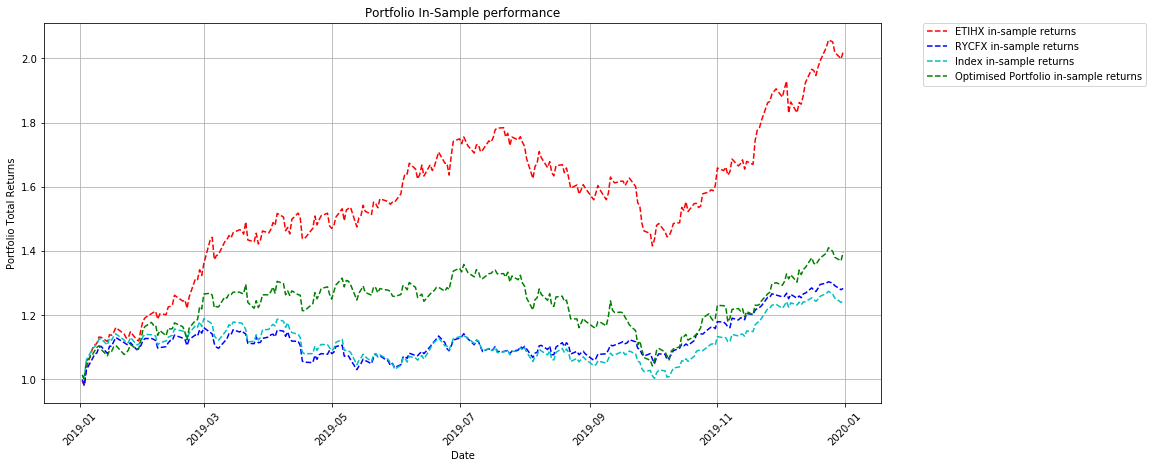

In [108]:
# get returns
ETIHX = np.dot(fund_weights, np.exp(ETIHX_log_returns_df.T) - 1)
ETIHX = np.cumprod(1 + ETIHX)

RYCFX = np.dot(RYCFX_weights, np.exp(RYCFX_log_returns_df.T) - 1)
RYCFX = np.cumprod(1 + RYCFX)

index = np.dot(index_weights, np.exp(index_log_returns_df.T) - 1)
index = np.cumprod(1 + index)

optimal = np.dot(optimised_weights, np.exp(ETIHX_log_returns_df.T) - 1)
optimal = np.cumprod(1 + optimal)

# plotting
date_index = ETIHX_log_returns_df.index
plt.figure(figsize=(15, 7))
plt.plot(date_index, ETIHX, 'r--', label='ETIHX in-sample returns')
plt.plot(date_index, RYCFX, 'b--', label='RYCFX in-sample returns')
plt.plot(date_index, index, 'c--', label='Index in-sample returns')
plt.plot(date_index, optimal, 'g--', label='Optimised Portfolio in-sample returns')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Portfolio Total Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Portfolio In-Sample performance")
plt.show()

In [109]:
# 1-2. portfolio returns based on adjusted returns, using ETIHX fund weights
exp_ret = bl_df['posteriors']
cov = np.cov(np.exp(ETIHX_log_returns_df.T) - 1)

assert all(fund_weights.index == exp_ret.index)
returns = np.dot(fund_weights, exp_ret)
variance = np.dot(fund_weights, np.dot(fund_weights, cov))
risk = np.sqrt(variance)
    
print(f'ETIHX portfolio returns: {returns}')
print(f'ETIHX portfolio risk: {risk}')

ETIHX portfolio returns: 0.24019632130110763
ETIHX portfolio risk: 0.017702914718875338


In [110]:
# 1-2. portfolio returns based on adjusted returns, using optimised weights

assert all(optimised_weights.index == exp_ret.index)
returns = np.dot(optimised_weights, exp_ret)
variance = np.dot(optimised_weights, np.dot(optimised_weights, cov))
risk = np.sqrt(variance)

print(f'Optimal portfolio returns: {returns}')
print(f'Optimal portfolio risk: {risk}')

Optimal portfolio returns: 0.2898594678599522
Optimal portfolio risk: 0.0161669333626457


Using the adjusted returns, it appears that our optimised portfolio gives slightly beter returns.

Based on the historical returns, our optimised portfolio also has slightly lower risk.

Interesting to note if we use the fund weights from ETIHX, the portfolio returns would have underperformed the benchmark index, which provided 25% returns.


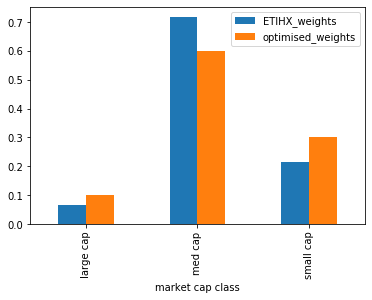

In [111]:
# 3. compare allocation by market cap weights
optimised_weights.name = 'optimised_weights'
best = ETIHX_holdings[['ticker', 'market cap ($B)']]
compare = best.merge(optimised_weights, how='left', left_on='ticker', right_index=True)
compare = compare.merge(fund_weights.rename("ETIHX_weights"), how='left', left_on='ticker', right_index=True)

# grp by market cap
compare['market cap class'] = compare['market cap ($B)'].apply(lambda x: 'small cap' if float(x) <= 2
                                                               else 'med cap' if float(x) <= 10 else 'large cap')

compare.groupby(by='market cap class').sum()[['ETIHX_weights', 'optimised_weights']].plot(kind='bar')

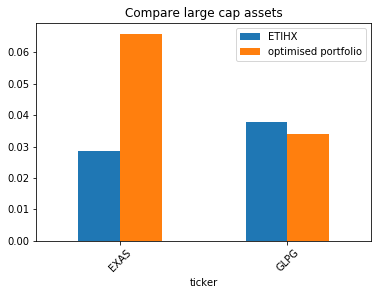

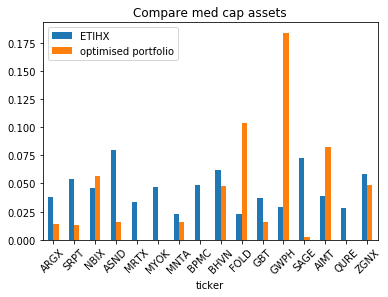

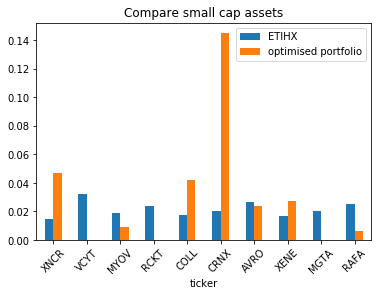

In [112]:
compare_weights = pd.DataFrame().from_dict({"ETIHX": ETIHX_oos_weights, "optimised portfolio":  optimised_oos_weights})
compare_weights = compare_weights.merge(compare[['ticker', 'market cap class']], how='left', left_index=True, right_on='ticker')
compare_weights.set_index('ticker', inplace=True, drop=True)

for size in compare_weights['market cap class'].unique():
    mask = compare_weights['market cap class']==size
    compare_weights[['ETIHX', 'optimised portfolio']][mask].plot(kind='bar')
    plt.title(f'Compare {size} assets')
    plt.xticks(rotation=45)
    plt.show()

We observe that ETIHX's portfolio has more weight in medium cap assets(market cap between USD 2-10 billion). On the other hand, our optimised portfolio has slightly more weight in small cap assets (market cap less than USD 2 billion).

We believe that this is better suited for our investment profile as we had previously identified these as having greater potential for growth and capital appreciation.

In the next step, we take analyse the assets which have the largest differences in allocated weights.


In [113]:
# find the assets where the difference in allocated weights are the largest

n = 5  # no. of assets to analyse

differences = compare_weights['ETIHX'] - compare_weights['optimised portfolio']

optimised_diff = differences.sort_values().iloc[:n]
ETIHX_diff = differences.sort_values().iloc[-n:]

print(optimised_diff)
print('\n')
print(ETIHX_diff)

ticker
GWPH   -0.155082
CRNX   -0.124539
FOLD   -0.081534
AIMT   -0.043406
EXAS   -0.037439
dtype: float64


ticker
SRPT    0.040992
MYOK    0.046523
BPMC    0.048761
ASND    0.063652
SAGE    0.070552
dtype: float64


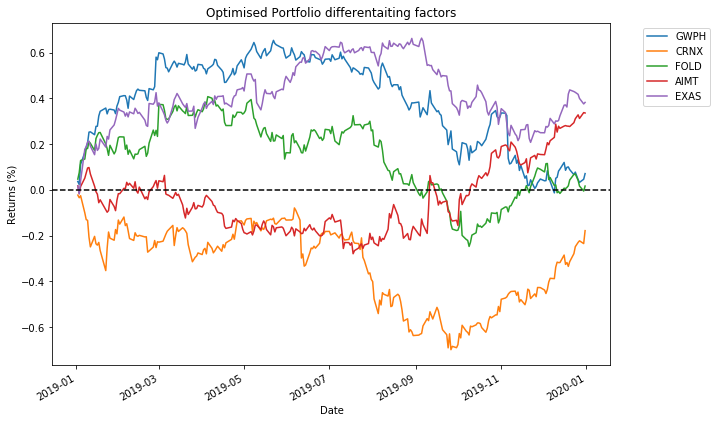

In [114]:
# optimised portfolio point-of-differences
ETIHX_log_returns_df[optimised_diff.index].expanding(0).apply(lambda x: sum(x), raw=True).plot(figsize=(10, 7))
plt.title("Optimised Portfolio differentaiting factors")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

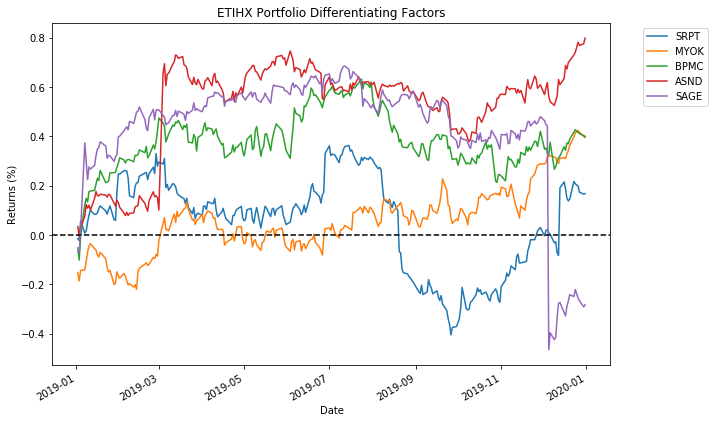

In [115]:
# ETIHX portfolio return driver
ETIHX_log_returns_df[ETIHX_diff.index].expanding(0).apply(lambda x: sum(x), raw=True).plot(figsize=(10, 7))
plt.title("ETIHX Portfolio Differentiating Factors")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [116]:
# compare the 2019 returns to the bl model posteriors

bl_against_actual = bl_df.merge(ETIHX_log_returns_df.sum().rename("observed returns (2019)"), left_index=True, right_index=True)

# optimised portfolio points of difference
mask = bl_against_actual.index.isin(optimised_diff.index)
bl_against_actual[mask]

,priors,views,posteriors,observed returns (2019)
EXAS,0.017679,0.339965,0.261946,0.382272
FOLD,0.017691,0.848049,0.403252,0.016564
GWPH,0.017307,0.970830,0.383970,0.071038
AIMT,0.017291,0.401554,0.315115,0.335935
CRNX,0.016571,0.461538,0.276239,-0.178395


In [117]:
# ETIHX portfolio points of difference
mask = bl_against_actual.index.isin(ETIHX_diff.index)
bl_against_actual[mask]

,priors,views,posteriors,observed returns (2019)
SRPT,0.017952,0.503720,0.328923,0.167583
ASND,0.017861,0.142783,0.106265,0.797773
MYOK,0.017414,0.144954,0.208900,0.399924
BPMC,0.017759,0.300836,0.272488,0.396085
SAGE,0.018210,0.504779,0.337087,-0.282857


We observe that the assets selected during our optimisation generally had higher posterior returns, indicating that the analyst outlook on these assets was optimistic despite their relatively poorer performance in 2019.

Similarly, the assets that were left out by the optimisation had relativlely lower posterior returns despite their more spectacular performance in 2019. Thus, our portfolio was underweight on these assets during the optimisation.

Next, we look at the diversifcation effect of these assets. For each of the selected assets, we calculate their correlation with the rest of the portfolio.


In [118]:
def get_diversification_effect(returns, weights, asset):
    '''
    returns: pd.DataFrame containing the log returns of the assets in universe
    weights: pd.Series of the asset weights in the portfolio, index of the series is the ticker of each asset
    asset: string reprsenting the ticker of the asset to be analysed
    '''
    
    # drop asset from weights and normalise
    normalised_weights = weights.copy(deep=True)
    normalised_weights.loc[asset] = 0
    normalised_weights = normalised_weights / normalised_weights.sum()
    
    # get new portfolio, assuming we dropped the asset
    new_portfolio_returns = np.dot(normalised_weights, np.exp(returns.T) - 1)
    
    # get return series of asset
    asset_returns = np.exp(returns[asset]) - 1
    
    # return the correlation
    corr_matrix = np.corrcoef(new_portfolio_returns, asset_returns)
    correlation = corr_matrix[0][1]
    return correlation

optimised_diversification_effect = pd.Series()
for ticker in optimised_diff.index:
    optimised_diversification_effect.loc[ticker] = \
        get_diversification_effect(ETIHX_log_returns_df, optimised_weights, ticker)

optimised_diversification_effect

C:\Users\Timothy Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


GWPH    0.391738
CRNX    0.192171
FOLD    0.564528
AIMT    0.492447
EXAS    0.472056
dtype: float64

In [119]:
ETIHX_diversification_effect = pd.Series()

for ticker in ETIHX_diff.index:
    ETIHX_diversification_effect.loc[ticker] = \
        get_diversification_effect(ETIHX_log_returns_df, optimised_weights, ticker)
        
ETIHX_diversification_effect

C:\Users\Timothy Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


SRPT    0.441784
MYOK    0.520902
BPMC    0.498994
ASND    0.155508
SAGE    0.334125
dtype: float64

#### Out-of-sample performance¶

In [120]:
out_of_sample

,return,std_dev,sharpe_ratio
ETIHX,0.083952,0.533909,0.157240
RYCFX,0.257055,0.392984,0.654110
Index,0.284516,0.411984,0.690600
optimal,0.084422,0.564514,0.149547


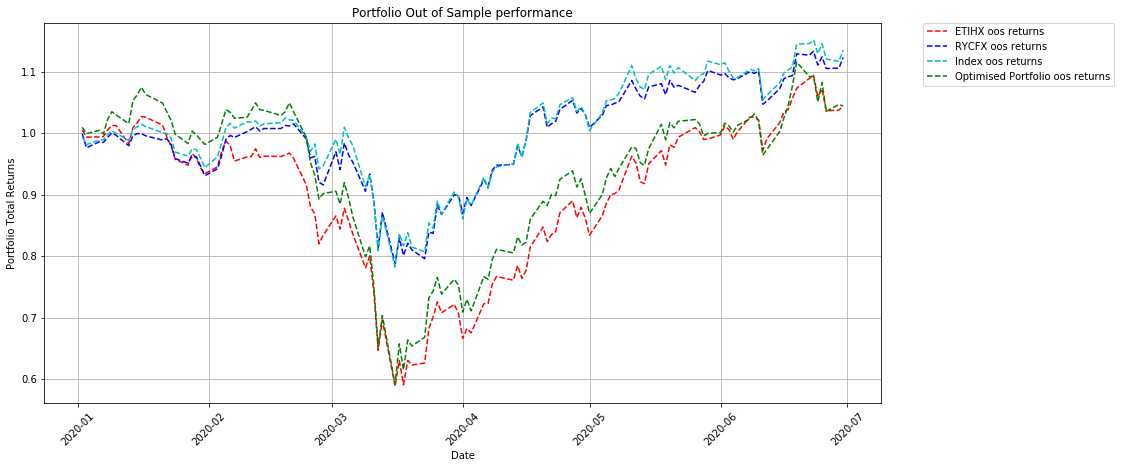

In [121]:
# get returns
ETIHX = np.dot(fund_weights, np.exp(ETIHX_oos_returns.T) - 1)
ETIHX = np.cumprod(1 + ETIHX)

RYCFX = np.dot(RYCFX_weights, np.exp(RYCFX_oos_returns.T) - 1)
RYCFX = np.cumprod(1 + RYCFX)

index = np.dot(index_weights, np.exp(index_oos_returns.T) - 1)
index = np.cumprod(1 + index)

optimal = np.dot(optimised_weights, np.exp(ETIHX_oos_returns.T) - 1)
optimal = np.cumprod(1 + optimal)

# plotting
date_index = ETIHX_oos_returns.index
plt.figure(figsize=(15, 7))
plt.plot(date_index, ETIHX, 'r--', label='ETIHX oos returns')
plt.plot(date_index, RYCFX, 'b--', label='RYCFX oos returns')
plt.plot(date_index, index, 'c--', label='Index oos returns')
plt.plot(date_index, optimal, 'g--', label='Optimised Portfolio oos returns')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Portfolio Total Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Portfolio Out of Sample performance")
plt.show()


Comparing our optimised portfolio against ETIHX, we observe that the returns are similar despite there being significant difference in portfolio allocation. This suggests that there is a large systemic risk among the basket of assets which we selected from to perform our optimisation.


Text(0.5, 1, 'Asset Correlations')

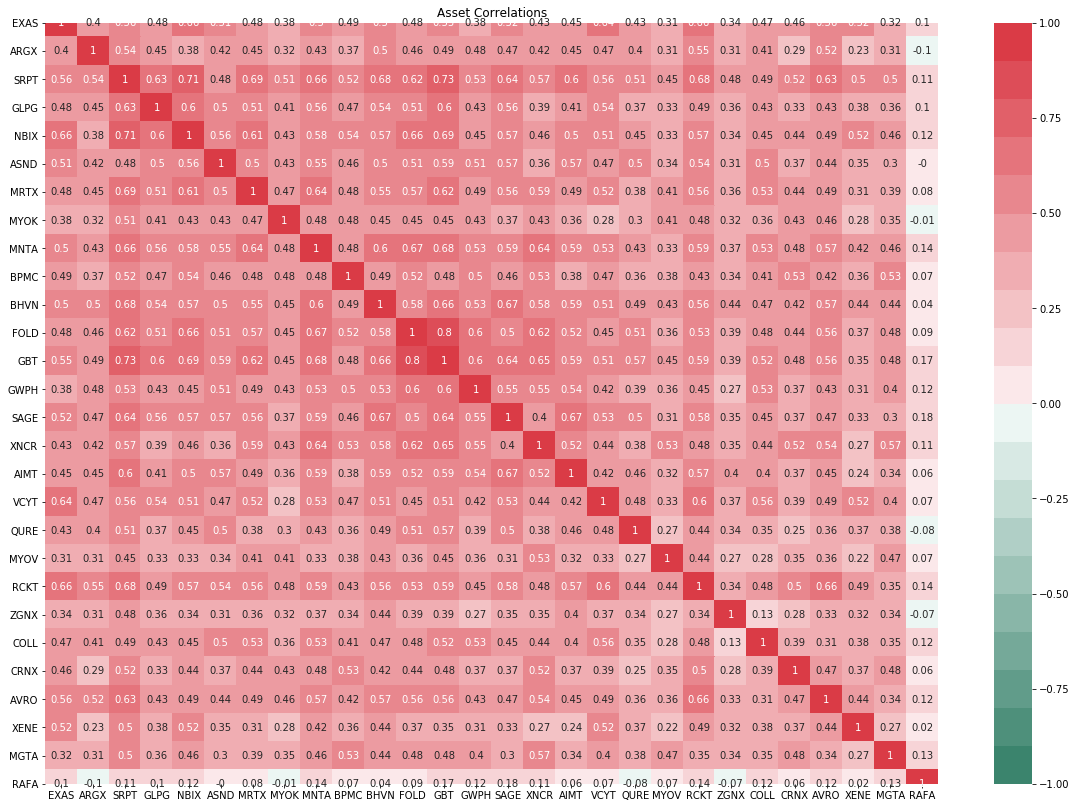

In [122]:
# check correlations
import seaborn as sns
# corr matrix
plt.figure(figsize=(20, 14))
sns.heatmap(round(ETIHX_oos_returns.corr(), 2), cmap=sns.diverging_palette(160, 10, n = 20), annot=True, vmin=-1, vmax=1)
plt.title("Asset Correlations")

Our intuition that there is strong systemic risk among the basket of assets we selected from is somewhat confirmed by the correlation matrix.


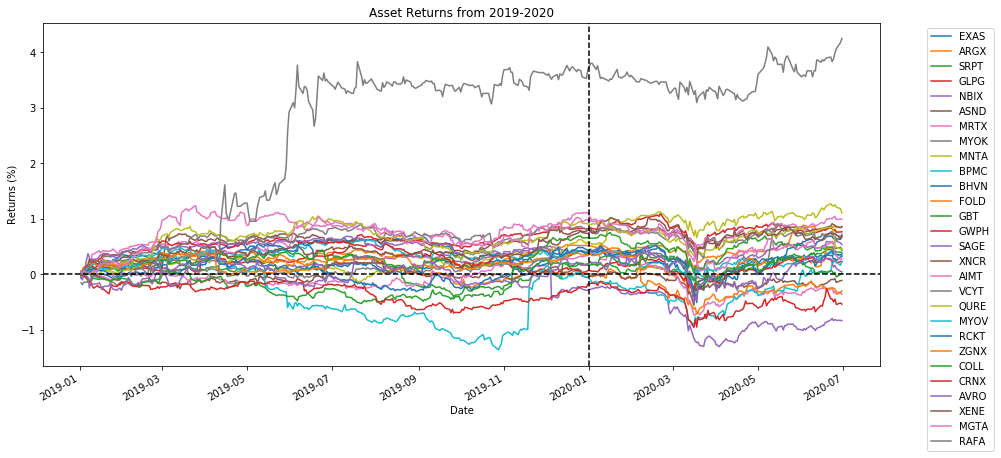

In [123]:
# append results
combined_ETIHX_returns = ETIHX_log_returns_df.append(ETIHX_oos_returns)
combined_ETIHX_returns.expanding(0).apply(lambda x: sum(x)).plot(figsize=(15, 7)).plot(figsize=(10, 7))
plt.title("Asset Returns from 2019-2020")
plt.ylabel("Returns (%)")
plt.axvline(x=dt.date(2020, 1, 1), color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting the return series, we observe that the returns of the assets in 2020 do indeed appear to be strongly correlated with one another. Notably, many of our assets saw a plunge in returns in March 2020. Strongly correlated assets provide little opportunity for diversification (at least if we assume a long only strategy).


In [124]:
# combine returns dataframes
ETIHX_returns_combined = ETIHX_log_returns_df.append(ETIHX_oos_returns)
RYCFX_returns_combined = RYCFX_log_returns_df.append(RYCFX_oos_returns)
index_returns_combined = index_log_returns_df.append(index_oos_returns)

ETIHX_returns_combined.shape

(377, 28)

In [125]:
# 1 year VaR analysis

def get_parametric_VaR_ES(returns_df, weights, window=252, alpha=0.05):
    '''
    returns_df: pd.DataFrame of the log returns of the assets in the given portfolio.
    weights: pd.Series of the weights of the given portfolio
    window: number of days in period
    alpha: level of VaR

    method returns the VaR and ES for a portfolio at the defined level of confidence, in terms of simple returns
    '''
    
    if not all(returns_df.columns == weights.index):
        print ('please align the indexes for weights and returns data')
        return
    
    # init variables
    var_list = []
    es_list = []
    
    # make copy
    returns_df_copy = returns_df.copy(deep=True)
    returns_df_copy.reset_index(inplace=True, drop=True)
    
    for i in range(0, 1 + returns_df_copy.shape[0]):
        # get subset of returns
        window_returns = returns_df_copy.loc[i-window:i - 1,]
        
        if window_returns.shape[0] == window:
            # variance-covariance_matrix 
            vcv = np.cov(window_returns.T)

            # portfolio variance
            variance = np.dot(weights, np.dot(vcv, weights))

            # portfolio mean return
            mean_log_return = window_returns.mean()
            arithmetic_return = np.exp(mean_log_return) - 1
            portfolio_mean_return = np.dot(weights, arithmetic_return)
            portfolio_log_return = np.log(1 + portfolio_mean_return)

            # 1% VaR 
            z_alpha = norm.ppf(alpha, loc=0, scale=1)
            log_return_var = portfolio_log_return + (z_alpha * np.sqrt(variance))

            # 1% ES
            log_return_es = portfolio_log_return + \
            ((norm.pdf(norm.ppf(1 - alpha, loc=0, scale=1), loc=0, scale=1)) * np.sqrt(variance)) / alpha

        else:
            log_return_var = np.NaN
            log_return_es = np.NaN

        var_list.append(log_return_var)
        es_list.append(log_return_es)
        
    # convert to simple returnss
    var = 1 - np.exp(pd.Series(var_list[1:], index=returns_df.index))
    es =  1 - np.exp(pd.Series(es_list[1:], index=returns_df.index))
    
    return var, es
    
ETIHX_VaR, ETIHX_ES = get_parametric_VaR_ES(ETIHX_returns_combined, ETIHX_weights)
RYCFX_VaR, RYCFX_ES = get_parametric_VaR_ES(RYCFX_returns_combined, RYCFX_weights)
index_VaR, index_ES = get_parametric_VaR_ES(index_returns_combined, index_weights)
optimised_VaR, optimised_ES = get_parametric_VaR_ES(ETIHX_returns_combined, optimised_weights)

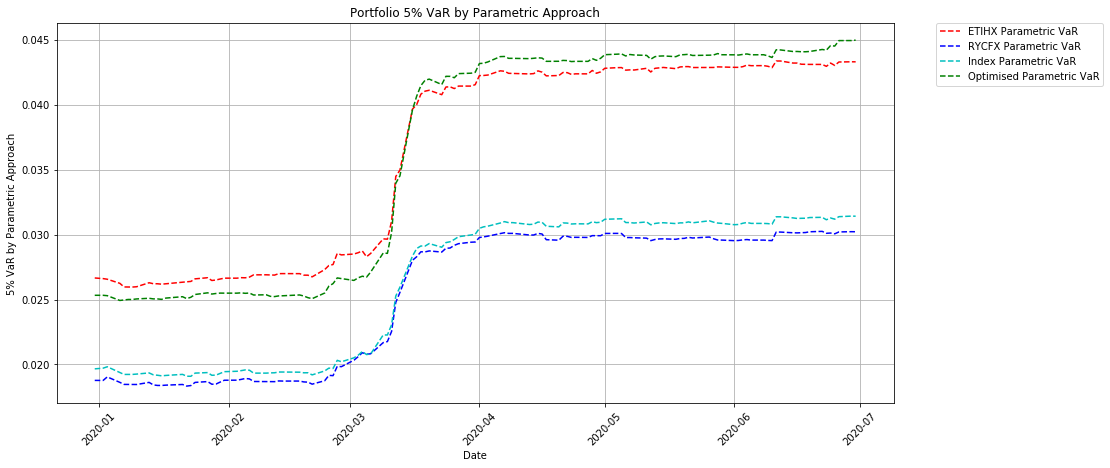

In [126]:
# plot VaR by parametric approach

# plotting
date_index = ETIHX_VaR.index
plt.figure(figsize=(15, 7))
plt.plot(date_index, ETIHX_VaR, 'r--', label='ETIHX Parametric VaR')
plt.plot(date_index, RYCFX_VaR, 'b--', label='RYCFX Parametric VaR')
plt.plot(date_index, index_VaR, 'c--', label='Index Parametric VaR')
plt.plot(date_index, optimised_VaR, 'g--', label='Optimised Parametric VaR')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('5% VaR by Parametric Approach')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Portfolio 5% VaR by Parametric Approach")
plt.show()

In [127]:
def get_historical_VaR_ES(returns_df, weights, window=252, alpha=0.05):
    '''
    returns_df: pd.DataFrame of the log returns of the assets in the given portfolio.
    weights: pd.Series of the weights of the given portfolio
    window: number of days in period
    alpha: level of VaR

    method returns the VaR and ES for a portfolio at the defined level of confidence, in terms of simple returns
    '''
    
    if not all(returns_df.columns == weights.index):
        print ('please align the indexes for weights and returns data')
        return
    
    # aggregate to portfolio level and get VaR
    portfolio_returns = pd.Series(np.dot(weights, np.exp(returns_df.T) - 1), index=returns_df.index)
    VaR_series = portfolio_returns.rolling(window).quantile(alpha)
    ES_series = pd.Series()
    # get ES
    for i in range(0, len(portfolio_returns)):
        past_252 = portfolio_returns.iloc[(i-window): i]
        T_days = len(past_252)
        if T_days == window:
            VaR = VaR_series.iloc[i]
            rt1 = filter(lambda x: x < VaR, past_252)
            ES_series.loc[VaR_series.index[i-1]] = sum(rt1) / (T_days * alpha) 
        else:
            ES_series.loc[VaR_series.index[i-1]] = np.NaN
        
    return -VaR_series, -ES_series

# historical VaR
ETIHX_VaR, ETIHX_ES = get_historical_VaR_ES(ETIHX_returns_combined, ETIHX_weights)
RYCFX_VaR, RYCFX_ES = get_historical_VaR_ES(RYCFX_returns_combined, RYCFX_weights)
index_VaR, index_ES = get_historical_VaR_ES(index_returns_combined, index_weights)
optimised_VaR, optimised_ES = get_historical_VaR_ES(ETIHX_returns_combined, optimised_weights)


C:\Users\Timothy Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


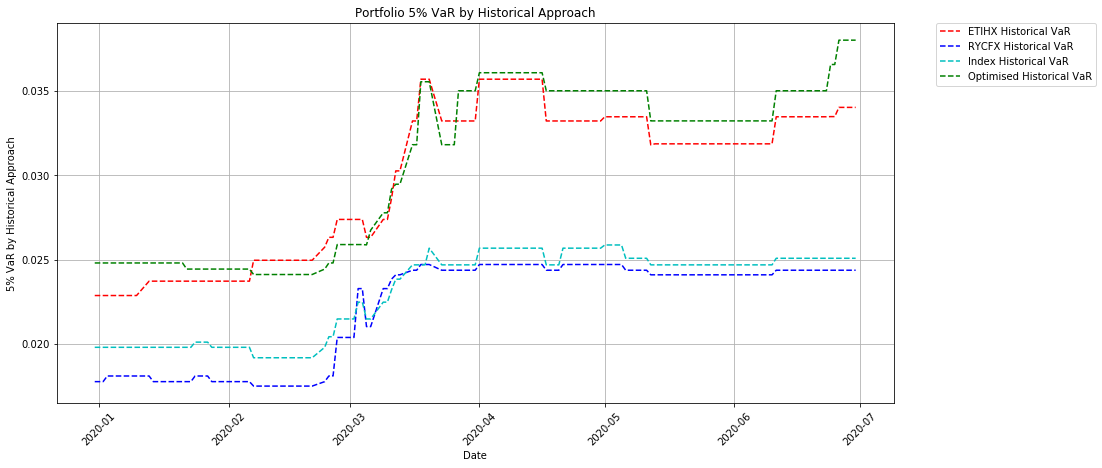

In [128]:
# plot VaR by Historical Simulation

# plotting
date_index = ETIHX_VaR.index
plt.figure(figsize=(15, 7))
plt.plot(date_index, ETIHX_VaR, 'r--', label='ETIHX Historical VaR')
plt.plot(date_index, RYCFX_VaR, 'b--', label='RYCFX Historical VaR')
plt.plot(date_index, index_VaR, 'c--', label='Index Historical VaR')
plt.plot(date_index, optimised_VaR, 'g--', label='Optimised Historical VaR')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('5% VaR by Historical Approach')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Portfolio 5% VaR by Historical Approach")
plt.show()